In [11]:
import h5py
import numpy as np
from astropy import units as U
from astropy import constants as Const
# -- FOMOspec -- 
from FOMOspec import util as UT
# -- feasibgs -- 
from feasibgs import forwardmodel

In [2]:
import matplotlib  as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [9]:
feagle = ''.join([UT.dat_dir(), 'spectra/eagle/EAGLE_Fullspectra_Nebular_onlyAGBdust_00000.txt']) 
spec = np.loadtxt(feagle)
spec *= U.Lsun / U.Hz
lam = np.loadtxt(''.join([UT.dat_dir(), 'spectra/eagle/FSPS_wave_Full.txt']))
lam *= U.Angstrom
c_light = Const.c
H0 = 70 * U.km / U.s / U.Mpc
zdist = 0.2 # median value of NSA
spec *= 1./(4.*np.pi * (zdist * c_light/H0).to(U.cm)**2) / lam**2 * c_light
spec.to(U.erg / U.s / U.cm**2 / U.Angstrom)

<Quantity [[6.64637597e-21, 6.80611555e-21, 7.85387120e-21, ...,
            7.66238060e-32, 7.38454341e-32, 7.11586176e-32],
           [6.49067010e-21, 6.62949412e-21, 7.63832332e-21, ...,
            7.69775201e-32, 7.41858727e-32, 7.14854331e-32],
           [5.77121349e-21, 5.86025360e-21, 6.74105434e-21, ...,
            5.94119650e-32, 5.72573312e-32, 5.51708702e-32],
           ...,
           [1.52068213e-22, 1.51639094e-22, 1.72875203e-22, ...,
            4.95789209e-34, 4.77793179e-34, 4.60430354e-34],
           [8.06768170e-21, 8.20170190e-21, 9.73016585e-21, ...,
            1.49852446e-30, 1.47254305e-30, 1.44696576e-30],
           [5.37622705e-21, 5.38675227e-21, 6.49095269e-21, ...,
            8.54655859e-31, 8.40288589e-31, 8.26135158e-31]] erg / (Angstrom cm2 s)>

Text(0,0.5,'Flux [$ergs/s/cm^2/A$]')

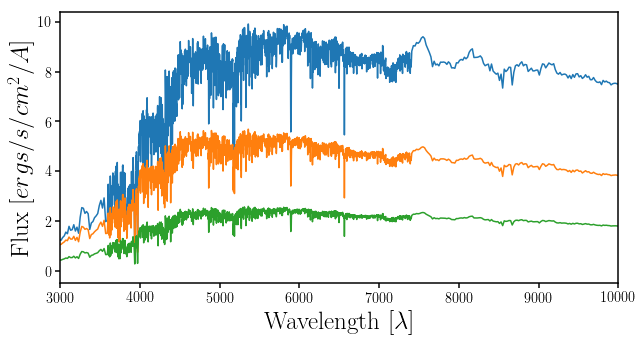

In [21]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in [0, 10, 15]: 
    sub.plot(lam, 1e17*spec.to(U.erg / U.s / U.cm**2 / U.Angstrom)[i,:])    
    sub.set_xlim([3000., 10000.])
sub.set_xlabel('Wavelength [$\lambda$]', fontsize=25)
sub.set_ylabel("Flux [$ergs/s/cm^2/A$]", fontsize=25)
#sub.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

In [12]:
eagle_input = h5py.File(''.join([UT.dat_dir(), 'spectra/eagle/0EAGLE_SFRHs.hdf5']), 'r') 

In [22]:
print [eagle_input['TotalMassCurrent'].value[i] for i in [0, 10, 15]]
print [eagle_input['TotalMassFormed'].value[i] for i in [0, 10, 15]]

[10.741592, 10.284473, 10.049041]
[11.008106835863229, 10.536106926858904, 10.306540554217854]
